In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
np.set_printoptions(precision=4)

In [3]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, cbar = False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    if cbar == True:
        plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Try for one thirds

In [4]:
train_X = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds/train_X.npy")
train_Y = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds/train_Y.npy")

In [5]:
boa = [25., 30.]
freq = [0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

categories = {}

i = 0
for b in boa:
    for f in freq:
        categories[i] = str(b) + ', ' + str(f)
        i+=1

## Make the Library

In [6]:
s = np.where((train_Y[:,0] == 25.) & (train_Y[:,1] == 0.3))

Data_split = [] # split the data into categories, to create the library.

i = 0

for b in boa:
    for f in freq:
        s = np.where((train_Y[:,0] == b) & (train_Y[:,1] == f))
        if s[0].shape[0] == 0:
            print(b, f)
            break
        print(b,f, ' : category', i)
        i += 1
        Data_split.append(train_X[s])

25.0 0.05  : category 0
25.0 0.1  : category 1
25.0 0.2  : category 2
25.0 0.25  : category 3
25.0 0.3  : category 4
25.0 0.35  : category 5
25.0 0.4  : category 6
25.0 0.5  : category 7
30.0 0.05  : category 8
30.0 0.1  : category 9
30.0 0.2  : category 10
30.0 0.25  : category 11
30.0 0.3  : category 12
30.0 0.35  : category 13
30.0 0.4  : category 14
30.0 0.5  : category 15


In [7]:
for i in range(16):
    print(len(Data_split[i]), end = '  ')
    
# Maximum possible value for rPODeach = 269.

277  277  284  280  269  286  280  275  705  705  698  702  713  696  702  707  

In [8]:
rPODeach = 25
# rPODeach = 10 makes the optimization infeasible. -> adjusted to 23 : infeasible (It initially worked but broke)
# Adjusting rPODeach to 100 -> The solver Failed
# Adjusting to 50 -> The solver failed
# Adjusting to 40 -> solver failed
# Adjusting to 30 -> solver failed
# Adjusting to 25 -> no solution

Library = np.empty((40000,0))

for cat in range(16):
    DataVecsTrain = np.zeros((40000, len(Data_split[cat])))

    for i, d in enumerate(Data_split[cat]):
        DataVecsTrain[:,i] = d.reshape(-1)
        
    U, S, Vt = np.linalg.svd(DataVecsTrain, full_matrices = False)
    Library = np.column_stack((Library, U[:,:rPODeach]))

## Test for the data used in training, it should have high accracy

In [9]:
idx = 0
X = train_X[idx].reshape(-1)
Y = train_Y[idx]

# at idx = 0, category = 15
print(Y)

[30.   0.5]


In [10]:
nModesSparse = 2*8*rPODeach

s = cp.Variable(nModesSparse)
objective = cp.Minimize(cp.norm(s, 1))
constraints = [cp.norm(Library @ s - X, 2) <= 0.0001]
prob = cp.Problem(objective, constraints)
# prob.solve(solver = 'ECOS', verbose = True)
prob.solve(solver = cp.MOSEK, verbose = False)
# prob.solve(verbose = False)

answer = s.value

In [11]:
print(answer) # No solution ...

None


 - Using all 200x200 doesn't work. Maybe the problem too complicated for the optimizer to solve?

# Try for one fifteenth ratio, so optimizers hopefully can solve it

In [12]:
train_X = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one fifteenth/train_X.npy")
train_Y = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one fifteenth/train_Y.npy")

true_label = np.zeros((len(train_Y), 1), dtype = '<U10')
for i in range(len(train_Y)):
    true_label[i] = (str(train_Y[i,0])+', '+ str(train_Y[i, 1]))

In [13]:
boa = [25., 30.]
freq = [0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

s = np.where((train_Y[:,0] == 25.) & (train_Y[:,1] == 0.3))

Data_split = [] # split the data into categories, to create the library.

i = 0


for b in boa:
    for f in freq:
        s = np.where((train_Y[:,0] == b) & (train_Y[:,1] == f))
        if s[0].shape[0] == 0:
            print(b, f)
            break
        print(b,f, ' : category', i)
        i += 1
        Data_split.append(train_X[s])

25.0 0.05  : category 0
25.0 0.1  : category 1
25.0 0.2  : category 2
25.0 0.25  : category 3
25.0 0.3  : category 4
25.0 0.35  : category 5
25.0 0.4  : category 6
25.0 0.5  : category 7
30.0 0.05  : category 8
30.0 0.1  : category 9
30.0 0.2  : category 10
30.0 0.25  : category 11
30.0 0.3  : category 12
30.0 0.35  : category 13
30.0 0.4  : category 14
30.0 0.5  : category 15


In [14]:
rPODeach = 10 # rPODeach = 10 is feasible for 1/15 ratio.

Library = np.empty((1600,0))

for cat in range(16):
    DataVecsTrain = np.zeros((1600, len(Data_split[cat])))

    for i, d in enumerate(Data_split[cat]):
        DataVecsTrain[:,i] = d.reshape(-1)
        
    U, S, Vt = np.linalg.svd(DataVecsTrain, full_matrices = False)
    Library = np.column_stack((Library, U[:,:rPODeach]))

In [15]:
nModesSparse = 2*8*rPODeach

answers = []

testing_number = 100 # takes too long to test for every case. testing for only 100 cases

for i in range(testing_number):
    s = cp.Variable(nModesSparse)
    objective = cp.Minimize(cp.norm(s, 1))
    constraints = [cp.norm(Library @ s - train_X[i].reshape(-1), 2) <= 0.0001]
    prob = cp.Problem(objective, constraints)
    # prob.solve(solver = 'ECOS', verbose = True)
    prob.solve(solver = cp.MOSEK, verbose = False)
    
    answers.append(s.value)

In [16]:
# print(answer)
predictions = []

for answer in answers:
    
    l2each = []
    for i in range(len(answer)):
        if i%rPODeach == 0:
            l2each.append(sum(abs(answer[i:i + rPODeach])))
    l2each = np.array(l2each)
    pred = np.argmax(l2each)
    predictions.append(categories[pred])

# print("l2 norms for each categories :\n", l2each)
# print("\nprediction based on largest norm :", categories[pred])
# print("true label :", Y)

print(classification_report(true_label[:testing_number], predictions, zero_division = 0))

              precision    recall  f1-score   support

  25.0, 0.05       0.00      0.00      0.00         1
   25.0, 0.1       1.00      0.33      0.50         3
   25.0, 0.2       0.25      0.25      0.25         8
  25.0, 0.25       0.00      0.00      0.00         5
   25.0, 0.3       0.33      0.33      0.33         3
  25.0, 0.35       0.33      0.25      0.29         4
   25.0, 0.4       0.50      0.40      0.44         5
   25.0, 0.5       0.33      0.67      0.44         3
  30.0, 0.05       0.17      0.17      0.17         6
   30.0, 0.1       1.00      0.33      0.50         3
   30.0, 0.2       0.40      0.53      0.46        15
  30.0, 0.25       0.38      0.38      0.38         8
   30.0, 0.3       0.33      0.50      0.40         4
  30.0, 0.35       0.44      0.22      0.30        18
   30.0, 0.4       0.00      0.00      0.00         4
   30.0, 0.5       0.50      0.70      0.58        10

    accuracy                           0.35       100
   macro avg       0.37   

Confusion matrix, without normalization


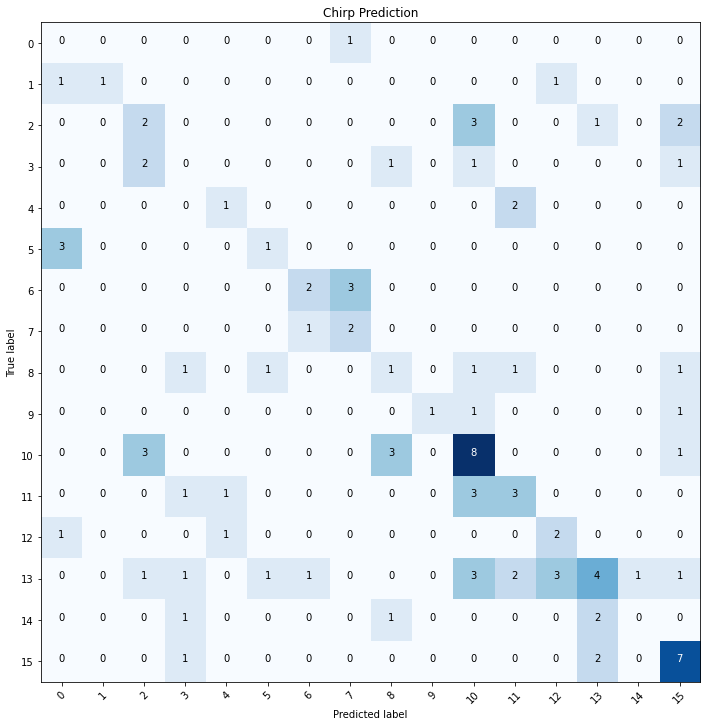

In [17]:
cnf_matrix = confusion_matrix(true_label[:testing_number], predictions)

plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes = categories, normalize=False,
                      title='Chirp Prediction')
plt.show()

- Not performing good

# Try collecting data from random points as in the paper

In [18]:
train_X = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds/train_X.npy")
train_Y = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds/train_Y.npy")

boa = [25., 30.]
freq = [0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

s = np.where((train_Y[:,0] == 25.) & (train_Y[:,1] == 0.3))

Data_split = [] # split the data into categories, to create the library.

i = 0


for b in boa:
    for f in freq:
        s = np.where((train_Y[:,0] == b) & (train_Y[:,1] == f))
        if s[0].shape[0] == 0:
            print(b, f)
            break
        print(b,f, ' : category', i)
        i += 1
        Data_split.append(train_X[s])

25.0 0.05  : category 0
25.0 0.1  : category 1
25.0 0.2  : category 2
25.0 0.25  : category 3
25.0 0.3  : category 4
25.0 0.35  : category 5
25.0 0.4  : category 6
25.0 0.5  : category 7
30.0 0.05  : category 8
30.0 0.1  : category 9
30.0 0.2  : category 10
30.0 0.25  : category 11
30.0 0.3  : category 12
30.0 0.35  : category 13
30.0 0.4  : category 14
30.0 0.5  : category 15


In [19]:
# Generate random indices to collect data

nPoints = 40

rand_idx = np.random.randint(20000, high= 40000, size= nPoints, dtype=int)

print(rand_idx)

[27833 30918 22598 24337 23382 37535 25275 37177 22370 28545 34176 23079
 37632 26004 27427 34006 21682 34706 32011 27602 33871 38790 29575 29381
 39856 29787 36374 20061 32954 24991 37388 38859 27890 22730 24957 32725
 29678 21073 27845 31772]


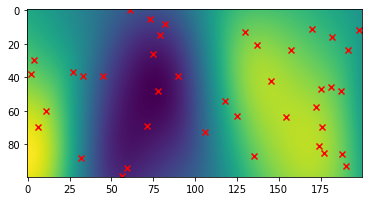

In [20]:
# Visualize the random points

plt.imshow(train_X[0][100:, :])

x = (train_X[0].reshape(-1))[rand_idx]

for i in range(nPoints):
    where = np.where(train_X[0][100:, :] == x[i])
    # print(train_X[0,where[0],where[1]], x[i])
    plt.scatter(where[1], where[0], c = 'r', marker = 'x')

In [21]:
rPODeach = 10 

Library = np.empty((nPoints,0))

for cat in range(16):
    DataVecsTrain = np.zeros((nPoints, len(Data_split[cat])))

    for i, d in enumerate(Data_split[cat]):
        DataVecsTrain[:,i] = (d.reshape(-1))[rand_idx]
        
    U, S, Vt = np.linalg.svd(DataVecsTrain, full_matrices = False)
    Library = np.column_stack((Library, U[:,:rPODeach]))

In [22]:
nModesSparse = 2*8*rPODeach

answers = []

testing_number = 200 # takes too long to test for every case. testing for only 200 cases

for i in range(testing_number):
    s = cp.Variable(nModesSparse)
    objective = cp.Minimize(cp.norm(s, 1))
    constraints = [cp.norm(Library @ s - (train_X[i].reshape(-1))[rand_idx], 2) <= 0.0001]
    prob = cp.Problem(objective, constraints)
    # prob.solve(solver = 'ECOS', verbose = True)
    prob.solve(solver = cp.MOSEK, verbose = False)
    
    answers.append(s.value)

In [23]:
# print(answer)
predictions = []

for answer in answers:
    
    l2each = []
    for i in range(len(answer)):
        if i%rPODeach == 0:
            l2each.append(sum(abs(answer[i:i + rPODeach])))
    l2each = np.array(l2each)
    pred = np.argmax(l2each)
    predictions.append(categories[pred])

# print("l2 norms for each categories :\n", l2each)
# print("\nprediction based on largest norm :", categories[pred])
# print("true label :", Y)

print(classification_report(true_label[:testing_number], predictions, zero_division = 0))

              precision    recall  f1-score   support

  25.0, 0.05       1.00      0.33      0.50         3
   25.0, 0.1       0.75      1.00      0.86         6
   25.0, 0.2       0.43      0.83      0.57        12
  25.0, 0.25       0.83      0.62      0.71         8
   25.0, 0.3       0.09      0.25      0.13         4
  25.0, 0.35       0.82      1.00      0.90         9
   25.0, 0.4       1.00      1.00      1.00        10
   25.0, 0.5       0.71      1.00      0.83         5
  30.0, 0.05       0.00      0.00      0.00        10
   30.0, 0.1       0.25      0.07      0.11        15
   30.0, 0.2       0.83      0.89      0.86        27
  30.0, 0.25       0.81      0.68      0.74        19
   30.0, 0.3       0.60      0.82      0.69        11
  30.0, 0.35       0.62      0.57      0.59        28
   30.0, 0.4       0.38      0.21      0.27        14
   30.0, 0.5       0.76      1.00      0.86        19

    accuracy                           0.66       200
   macro avg       0.62   

Confusion matrix, without normalization


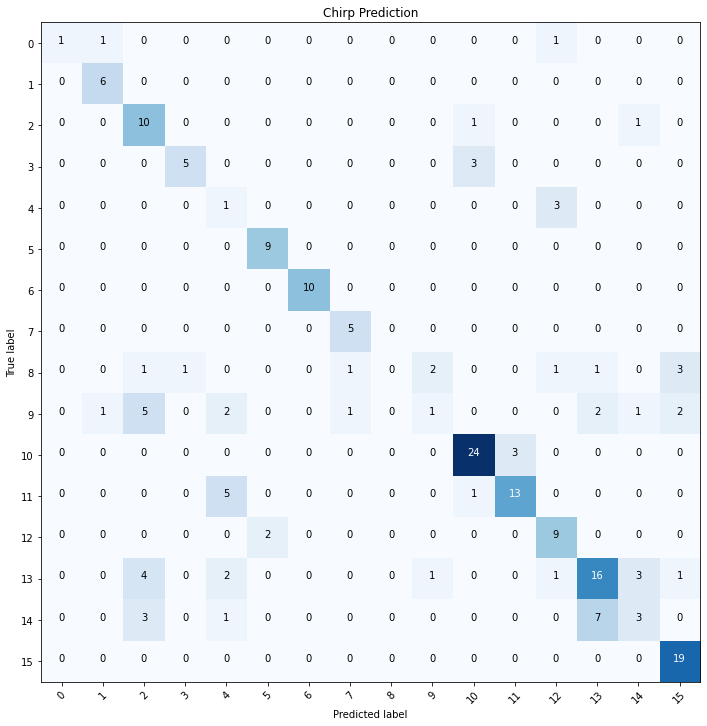

In [24]:
cnf_matrix = confusion_matrix(true_label[:testing_number], predictions)

plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes = categories, normalize=False,
                      title='Chirp Prediction')
plt.show()

- It works in similar performance as the paper...